In [1]:
from __future__ import print_function
import tensorflow as tf
import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import optimizers
import numpy as np
from keras.utils import to_categorical
from keras.layers import Lambda
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras import backend as K
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import os, shutil
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import pandas as pd

img_size = 150


import os

Using TensorFlow backend.


In [2]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = 'dataset'

# The directory where we will
# store our smaller dataset
base_dir = 'datatrain'
os.mkdir(base_dir)

In [3]:
# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training cat pictures
train_fire_dir = os.path.join(train_dir, 'fire')
os.mkdir(train_fire_dir)

# Directory with our training dog pictures
train_normal_dir = os.path.join(train_dir, 'normal')
os.mkdir(train_normal_dir)

# Directory with our validation cat pictures
validation_fire_dir = os.path.join(validation_dir, 'fire')
os.mkdir(validation_fire_dir)

# Directory with our validation dog pictures
validation_normal_dir = os.path.join(validation_dir, 'normal')
os.mkdir(validation_normal_dir)

# Directory with our validation cat pictures
test_fire_dir = os.path.join(test_dir, 'fire')
os.mkdir(test_fire_dir)

# Directory with our validation dog pictures
test_normal_dir = os.path.join(test_dir, 'normal')
os.mkdir(test_normal_dir)

In [4]:
# Copy first 1000 cat images to train_cats_dir
fnames = ['fire_{}.jpg'.format(i) for i in range(1,600)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_fire_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['fire_{}.jpg'.format(i) for i in range(600, 750)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_fire_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['fire_{}.jpg'.format(i) for i in range(750, 900)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_fire_dir, fname)
    shutil.copyfile(src, dst)

In [5]:
# Copy first 1000 dog images to train_dogs_dir
fnames = ['normal_{}.jpg'.format(i) for i in range(1,600)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_normal_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['normal_{}.jpg'.format(i) for i in range(600, 750)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_normal_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['normal_{}.jpg'.format(i) for i in range(750, 900)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_normal_dir, fname)
    shutil.copyfile(src, dst)

In [6]:
print('total training fire images:', len(os.listdir(train_fire_dir)))
print('total training normal images:', len(os.listdir(train_normal_dir)))
print('total validation fire images:', len(os.listdir(validation_fire_dir)))
print('total validation normal images:', len(os.listdir(validation_normal_dir)))
print('total test fire images:', len(os.listdir(test_fire_dir)))
print('total test normal images:', len(os.listdir(test_normal_dir)))

total training fire images: 599
total training normal images: 599
total validation fire images: 150
total validation normal images: 150
total test fire images: 150
total test normal images: 150


In [7]:
datagen = ImageDataGenerator(
      rescale=1./255,  
      rotation_range=20,
      #width_shift_range=0.2,
      #height_shift_range=0.2,
      #shear_range=0.2,
      #zoom_range=0.2,
      horizontal_flip=True)
      #fill_mode='nearest')

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    #shear_range=0.2,
    #zoom_range=0.2,
    horizontal_flip=True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=img_size,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=img_size,
        class_mode='categorical')


Found 1198 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


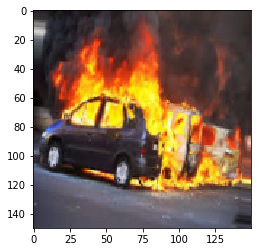

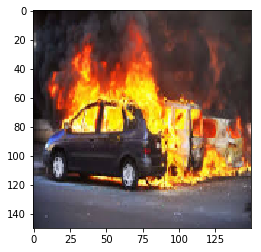

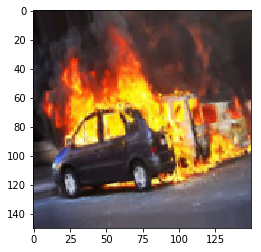

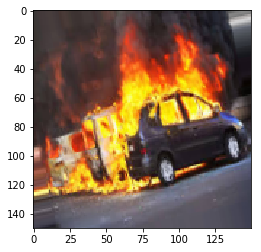

In [9]:
# This is module with image preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_fire_dir, fname) for fname in os.listdir(train_fire_dir)]

# We pick one image to "augment"
import random
nomer=random.randint(0,600)

img_path = fnames[nomer]

# Read the image and resize it
img = image.load_img(img_path, target_size=(img_size, img_size))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [10]:
img_shape = (img_size, img_size, 3)
base_model = tf.keras.applications.MobileNetV2(input_shape=img_shape,weights="imagenet",include_top=False)

In [11]:
base_model.trainable = True

In [12]:
from tensorflow import keras
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam


def build_mobilenetv2_model(base_model):
    model = Sequential([
        base_model,
          Conv2D(32, 3, activation='relu'),
          GlobalAveragePooling2D(),
        Dense(126, activation='relu'),
        Dense(2, activation='softmax')]
    )

    return model

In [13]:
model = build_mobilenetv2_model(base_model)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
conv2d (Conv2D)              (None, 3, 3, 32)          368672    
_________________________________________________________________
global_average_pooling2d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 126)               4158      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 254       
Total params: 2,631,068
Trainable params: 2,596,956
Non-trainable params: 34,112
_________________________________________________________________


In [15]:
from tensorflow.keras.optimizers import Adam
adam = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('fire_train.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history = model.fit(train_generator,
                    #steps_per_epoch=10,
                    epochs=250,
                    validation_data=validation_generator,
                    #validation_steps=10,
                    shuffle = True,
                    callbacks=[mc]
                  )    

Epoch 1/250
8/8 [==============================] - 29s 3s/step - loss: 0.9600 - accuracy: 0.6557 - val_loss: 2.3312 - val_accuracy: 0.5900

Epoch 00001: val_accuracy improved from -inf to 0.59000, saving model to fire_train.h5
Epoch 2/250
8/8 [==============================] - 23s 3s/step - loss: 0.0686 - accuracy: 0.9806 - val_loss: 2.7003 - val_accuracy: 0.5500

Epoch 00002: val_accuracy did not improve from 0.59000
Epoch 3/250
8/8 [==============================] - 23s 3s/step - loss: 0.0303 - accuracy: 0.9922 - val_loss: 6.1426 - val_accuracy: 0.5200

Epoch 00003: val_accuracy did not improve from 0.59000
Epoch 4/250
8/8 [==============================] - 23s 3s/step - loss: 0.0168 - accuracy: 0.9949 - val_loss: 6.8061 - val_accuracy: 0.5400

Epoch 00004: val_accuracy did not improve from 0.59000
Epoch 5/250
8/8 [==============================] - 23s 3s/step - loss: 0.0134 - accuracy: 0.9946 - val_loss: 12.2532 - val_accuracy: 0.5100

Epoch 00005: val_accuracy did not improve from 

8/8 [==============================] - 23s 3s/step - loss: 9.4554e-06 - accuracy: 1.0000 - val_loss: 3.3376 - val_accuracy: 0.5767

Epoch 00042: val_accuracy did not improve from 0.59000
Epoch 43/250
8/8 [==============================] - 23s 3s/step - loss: 9.7231e-06 - accuracy: 1.0000 - val_loss: 3.1995 - val_accuracy: 0.5767

Epoch 00043: val_accuracy did not improve from 0.59000
Epoch 44/250
8/8 [==============================] - 23s 3s/step - loss: 4.7750e-05 - accuracy: 1.0000 - val_loss: 3.0655 - val_accuracy: 0.5667

Epoch 00044: val_accuracy did not improve from 0.59000
Epoch 45/250
8/8 [==============================] - 23s 3s/step - loss: 1.2937e-05 - accuracy: 1.0000 - val_loss: 2.9471 - val_accuracy: 0.5633

Epoch 00045: val_accuracy did not improve from 0.59000
Epoch 46/250
8/8 [==============================] - 23s 3s/step - loss: 1.1156e-05 - accuracy: 1.0000 - val_loss: 2.8492 - val_accuracy: 0.5767

Epoch 00046: val_accuracy did not improve from 0.59000
Epoch 47/250


8/8 [==============================] - 23s 3s/step - loss: 0.0115 - accuracy: 0.9964 - val_loss: 10.0014 - val_accuracy: 0.5400

Epoch 00081: val_accuracy did not improve from 0.78000
Epoch 82/250
8/8 [==============================] - 23s 3s/step - loss: 0.0077 - accuracy: 0.9994 - val_loss: 10.4168 - val_accuracy: 0.5200

Epoch 00082: val_accuracy did not improve from 0.78000
Epoch 83/250
8/8 [==============================] - 23s 3s/step - loss: 0.0085 - accuracy: 0.9975 - val_loss: 9.6107 - val_accuracy: 0.5333

Epoch 00083: val_accuracy did not improve from 0.78000
Epoch 84/250
8/8 [==============================] - 23s 3s/step - loss: 0.0064 - accuracy: 0.9985 - val_loss: 9.5407 - val_accuracy: 0.4133

Epoch 00084: val_accuracy did not improve from 0.78000
Epoch 85/250
8/8 [==============================] - 23s 3s/step - loss: 0.0127 - accuracy: 0.9955 - val_loss: 7.2866 - val_accuracy: 0.5833

Epoch 00085: val_accuracy did not improve from 0.78000
Epoch 86/250
8/8 [=============

8/8 [==============================] - 23s 3s/step - loss: 5.7630e-04 - accuracy: 1.0000 - val_loss: 11.1125 - val_accuracy: 0.5367

Epoch 00122: val_accuracy did not improve from 0.78000
Epoch 123/250
8/8 [==============================] - 23s 3s/step - loss: 5.3629e-05 - accuracy: 1.0000 - val_loss: 10.9207 - val_accuracy: 0.5400

Epoch 00123: val_accuracy did not improve from 0.78000
Epoch 124/250
8/8 [==============================] - 23s 3s/step - loss: 7.6845e-04 - accuracy: 1.0000 - val_loss: 10.4579 - val_accuracy: 0.5867

Epoch 00124: val_accuracy did not improve from 0.78000
Epoch 125/250
8/8 [==============================] - 23s 3s/step - loss: 1.2253e-05 - accuracy: 1.0000 - val_loss: 9.5722 - val_accuracy: 0.6467

Epoch 00125: val_accuracy did not improve from 0.78000
Epoch 126/250
8/8 [==============================] - 23s 3s/step - loss: 3.1581e-04 - accuracy: 1.0000 - val_loss: 8.9838 - val_accuracy: 0.6600

Epoch 00126: val_accuracy did not improve from 0.78000
Epoch 

8/8 [==============================] - 23s 3s/step - loss: 4.7022e-07 - accuracy: 1.0000 - val_loss: 7.1899 - val_accuracy: 0.7400

Epoch 00163: val_accuracy did not improve from 0.78000
Epoch 164/250
8/8 [==============================] - 23s 3s/step - loss: 5.6867e-07 - accuracy: 1.0000 - val_loss: 7.1772 - val_accuracy: 0.7400

Epoch 00164: val_accuracy did not improve from 0.78000
Epoch 165/250
8/8 [==============================] - 23s 3s/step - loss: 1.7479e-07 - accuracy: 1.0000 - val_loss: 7.1656 - val_accuracy: 0.7400

Epoch 00165: val_accuracy did not improve from 0.78000
Epoch 166/250
8/8 [==============================] - 23s 3s/step - loss: 1.0622e-06 - accuracy: 1.0000 - val_loss: 7.1550 - val_accuracy: 0.7400

Epoch 00166: val_accuracy did not improve from 0.78000
Epoch 167/250
8/8 [==============================] - 23s 3s/step - loss: 1.2058e-04 - accuracy: 1.0000 - val_loss: 7.1592 - val_accuracy: 0.7400

Epoch 00167: val_accuracy did not improve from 0.78000
Epoch 168

8/8 [==============================] - 23s 3s/step - loss: 6.4052e-07 - accuracy: 1.0000 - val_loss: 6.4261 - val_accuracy: 0.7733

Epoch 00204: val_accuracy did not improve from 0.78000
Epoch 205/250
8/8 [==============================] - 23s 3s/step - loss: 2.6190e-06 - accuracy: 1.0000 - val_loss: 6.4157 - val_accuracy: 0.7733

Epoch 00205: val_accuracy did not improve from 0.78000
Epoch 206/250
8/8 [==============================] - 23s 3s/step - loss: 1.9429e-07 - accuracy: 1.0000 - val_loss: 6.4077 - val_accuracy: 0.7733

Epoch 00206: val_accuracy did not improve from 0.78000
Epoch 207/250
8/8 [==============================] - 23s 3s/step - loss: 7.3418e-08 - accuracy: 1.0000 - val_loss: 6.4018 - val_accuracy: 0.7733

Epoch 00207: val_accuracy did not improve from 0.78000
Epoch 208/250
8/8 [==============================] - 23s 3s/step - loss: 1.6279e-07 - accuracy: 1.0000 - val_loss: 6.3968 - val_accuracy: 0.7733

Epoch 00208: val_accuracy did not improve from 0.78000
Epoch 209

8/8 [==============================] - 23s 3s/step - loss: 9.8520e-08 - accuracy: 1.0000 - val_loss: 6.2821 - val_accuracy: 0.7800

Epoch 00245: val_accuracy did not improve from 0.78000
Epoch 246/250
8/8 [==============================] - 24s 3s/step - loss: 4.2992e-06 - accuracy: 1.0000 - val_loss: 6.2754 - val_accuracy: 0.7800

Epoch 00246: val_accuracy did not improve from 0.78000
Epoch 247/250
8/8 [==============================] - 24s 3s/step - loss: 6.3383e-07 - accuracy: 1.0000 - val_loss: 6.2703 - val_accuracy: 0.7833

Epoch 00247: val_accuracy improved from 0.78000 to 0.78333, saving model to fire_train.h5
Epoch 248/250
8/8 [==============================] - 24s 3s/step - loss: 4.6417e-07 - accuracy: 1.0000 - val_loss: 6.2673 - val_accuracy: 0.7800

Epoch 00248: val_accuracy did not improve from 0.78333
Epoch 249/250
8/8 [==============================] - 23s 3s/step - loss: 1.3199e-05 - accuracy: 1.0000 - val_loss: 6.1415 - val_accuracy: 0.7800

Epoch 00249: val_accuracy did

In [17]:
base_model.trainable = True
# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable =  False

In [18]:
from tensorflow.keras.optimizers import Adam
adam = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('fire_train_tune.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history = model.fit(train_generator,
                    #steps_per_epoch=10,
                    epochs=50,
                    validation_data=validation_generator,
                    #validation_steps=10,
                    shuffle = True,
                    callbacks=[mc]
                  )    

Epoch 1/50
8/8 [==============================] - 19s 2s/step - loss: 0.0259 - accuracy: 0.9982 - val_loss: 3.7279 - val_accuracy: 0.7833

Epoch 00001: val_accuracy improved from -inf to 0.78333, saving model to fire_train_tune.h5
Epoch 2/50
8/8 [==============================] - 15s 2s/step - loss: 0.0031 - accuracy: 0.9989 - val_loss: 1.9156 - val_accuracy: 0.7433

Epoch 00002: val_accuracy did not improve from 0.78333
Epoch 3/50
8/8 [==============================] - 15s 2s/step - loss: 0.0044 - accuracy: 0.9979 - val_loss: 2.3499 - val_accuracy: 0.7333

Epoch 00003: val_accuracy did not improve from 0.78333
Epoch 4/50
8/8 [==============================] - 15s 2s/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 2.6014 - val_accuracy: 0.7367

Epoch 00004: val_accuracy did not improve from 0.78333
Epoch 5/50
8/8 [==============================] - 15s 2s/step - loss: 4.1721e-06 - accuracy: 1.0000 - val_loss: 2.9136 - val_accuracy: 0.7500

Epoch 00005: val_accuracy did not improve fr

8/8 [==============================] - 15s 2s/step - loss: 0.0055 - accuracy: 0.9979 - val_loss: 27.4950 - val_accuracy: 0.6067

Epoch 00042: val_accuracy did not improve from 0.78333
Epoch 43/50
8/8 [==============================] - 15s 2s/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 27.6110 - val_accuracy: 0.6367

Epoch 00043: val_accuracy did not improve from 0.78333
Epoch 44/50
8/8 [==============================] - 15s 2s/step - loss: 3.8845e-04 - accuracy: 1.0000 - val_loss: 27.6287 - val_accuracy: 0.6467

Epoch 00044: val_accuracy did not improve from 0.78333
Epoch 45/50
8/8 [==============================] - 15s 2s/step - loss: 5.4741e-05 - accuracy: 1.0000 - val_loss: 27.0444 - val_accuracy: 0.6400

Epoch 00045: val_accuracy did not improve from 0.78333
Epoch 46/50
8/8 [==============================] - 15s 2s/step - loss: 5.3626e-05 - accuracy: 1.0000 - val_loss: 26.1160 - val_accuracy: 0.6567

Epoch 00046: val_accuracy did not improve from 0.78333
Epoch 47/50
8/8 [===

model.summary()

model = tf.keras.Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.summary()

from tensorflow.keras.optimizers import Adam
adam = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

from tensorflow.keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('fire_train.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history = model.fit(train_generator,
                    #steps_per_epoch=10,
                    epochs=100,
                    validation_data=validation_generator,
                    #validation_steps=10,
                    shuffle = True,
                    callbacks=[mc]
                  )    

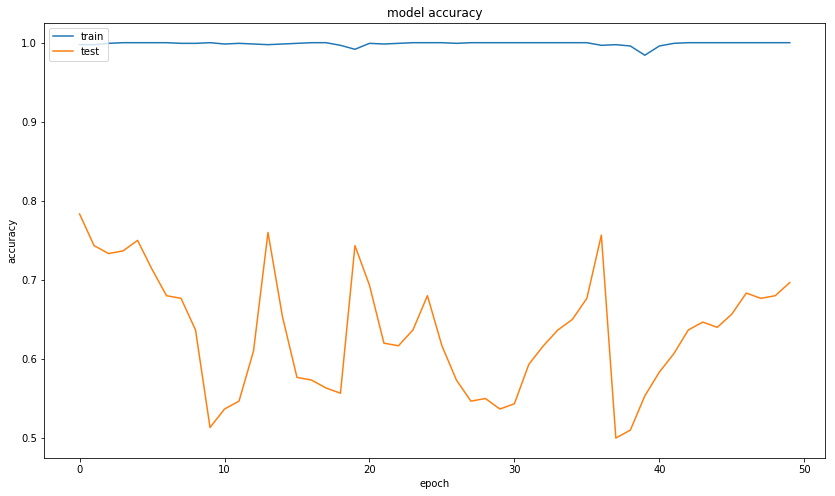

In [20]:
# summarize history for accuracy

plt.figure(figsize=(14,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

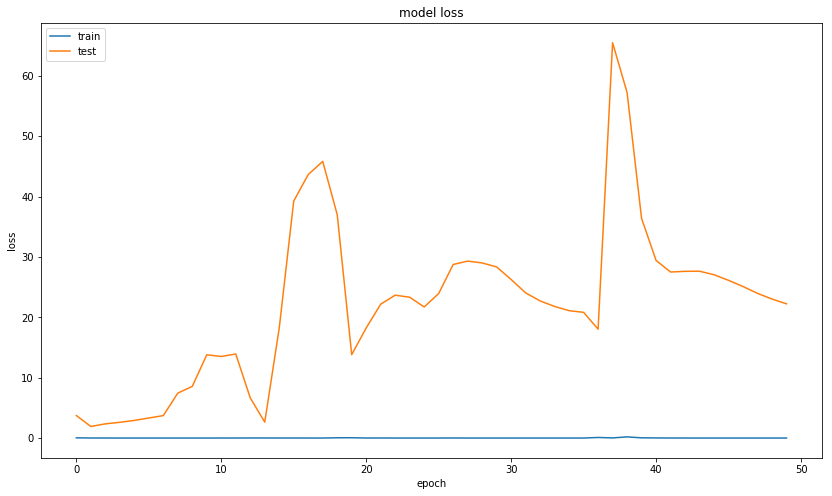

In [21]:

# summarize history for loss
plt.figure(figsize=(14,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
import cv2
#from keras.models import load_model
#model = load_model('fire_train.h5')

In [23]:
DATADIR = 'datatrain/test'
CATEGORIES = ['fire', 'normal']

In [24]:
for category in CATEGORIES :
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_UNCHANGED)

training_data = []

def create_training_data():
    for category in CATEGORIES :
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try :
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_UNCHANGED)
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

In [25]:
import random
create_training_data()
random.shuffle(training_data)

X = [] #features
y = [] #labels

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size,3)
y = np.asarray(y)

In [26]:
X.shape

(300, 150, 150, 3)

In [27]:
#y_trainnp = y_train.to_numpy()
#y_testnp = y.to_numpy()

#y_train= to_categorical(y_trainnp)
y_test= to_categorical(y)


In [28]:
score = model.evaluate(X, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 27.424842834472656
Test accuracy: 0.6399999856948853


In [29]:
y_test = np.argmax(y_test, axis=1) 
y_pred = model.predict_classes(X)
#report = classification_report(y_test, y_pred, output_dict=True)

print(classification_report(y_test, y_pred, digits=4))
#df_report = pd.DataFrame(report).transpose()
#df_report.to_csv('Result/DNN-3Layer_ClassReport.csv')

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
#df_report = pd.DataFrame(report).transpose()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0     0.6061    0.8000    0.6897       150
           1     0.7059    0.4800    0.5714       150

    accuracy                         0.6400       300
   macro avg     0.6560    0.6400    0.6305       300
weighted avg     0.6560    0.6400    0.6305       300



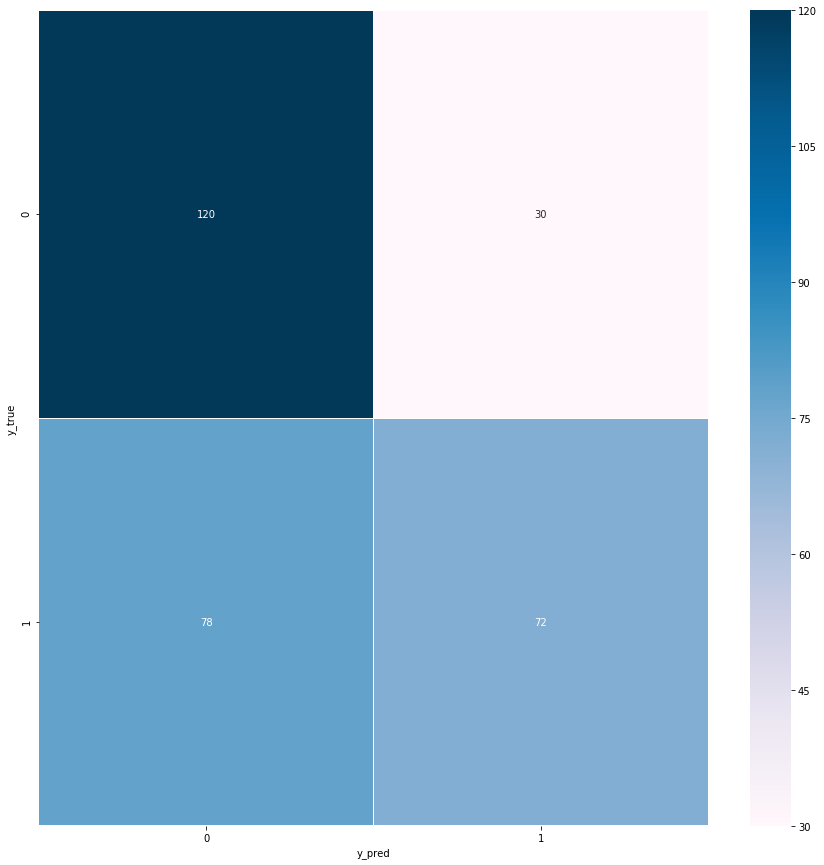

In [30]:
import seaborn as sns

y_true = y_test
cm = confusion_matrix(y_true, y_pred)
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cm, annot = True, linewidths = 0.2, cmap = "PuBu", linecolor="white", fmt=".0f",ax = ax)
#np.savetxt('Result/DNN-3Layer_covmatrix.csv', cm, delimiter=";")

plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.draw()
#plt.savefig('Result/DNN-3Layer_covmatrix.png')
plt.show()

In [31]:
from tensorflow.keras.models import load_model
model1 = load_model('fire_train_tune.h5')

model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [37]:
img = cv2.imread('dataset/fire_8.jpg')
img = cv2.resize(img,(img_size,img_size))
img = np.reshape(img,[1,img_size,img_size,3])

classes = model.predict_classes(img)

print (classes)

[0]


In [34]:
img = cv2.imread('dataset/normal_3.jpg')
img = cv2.resize(img,(img_size,img_size))
img = np.reshape(img,[1,img_size,img_size,3])

classes = model.predict_classes(img)

print (classes)

[1]
